In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import TimeSeriesSplit

## Загружаем данные и первичный анализ

In [26]:
df = pd.read_csv('AirPassengers.csv')
df['date'] = pd.to_datetime(df['Month']).dt.to_period('M')
df = df.drop('Month', axis=1)
df = df.groupby('date').sum()
df

,#Passengers
date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


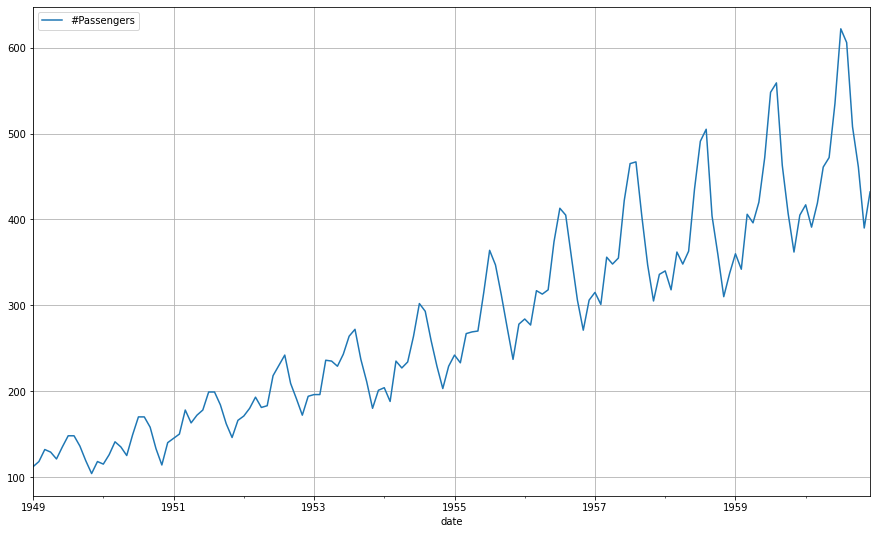

In [19]:
df.plot(figsize=(15,9))
plt.grid()
plt.show()

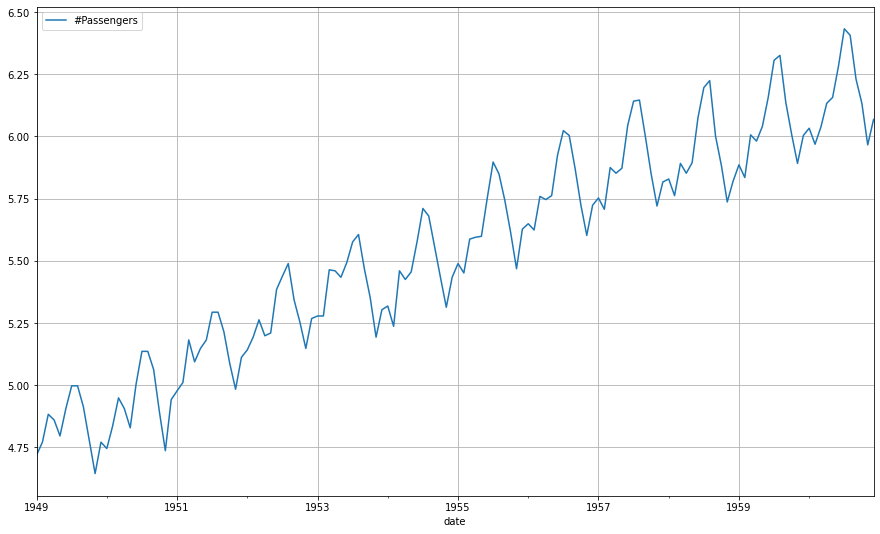

In [34]:
np.log(df).plot(figsize=(15,9))
plt.grid()
plt.show()

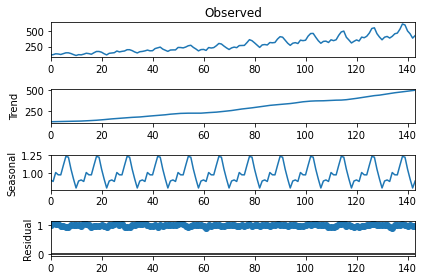

In [33]:
dec_res = seasonal_decompose(df.values, model='mul', extrapolate_trend=3, period=12)
dec_res.plot();

## Прогнозирование

### модели типа SARIMA

In [37]:
dfl = np.log(df)

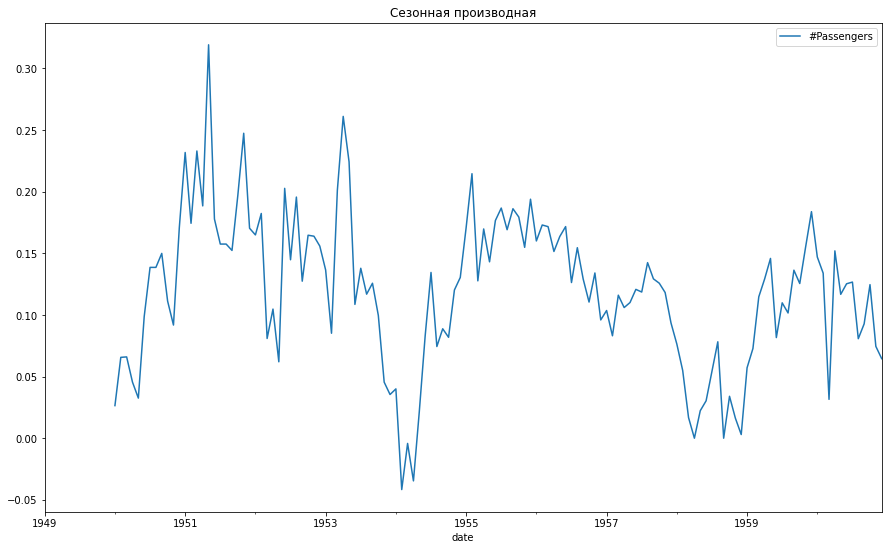

In [45]:
from statsmodels.tsa.stattools import kpss

d_dfl = dfl.diff(periods=12)
d_dfl.plot(figsize=(15,9))
plt.title('Сезонная производная')
plt.show()

In [163]:
print(kpss(d_dfl.dropna()))
print(adfuller(d_dfl.dropna()))

(0.2918323624936068, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(-2.7095768189885687, 0.07239567181769489, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -424.76083484995365)


/home/bakhtiyar/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


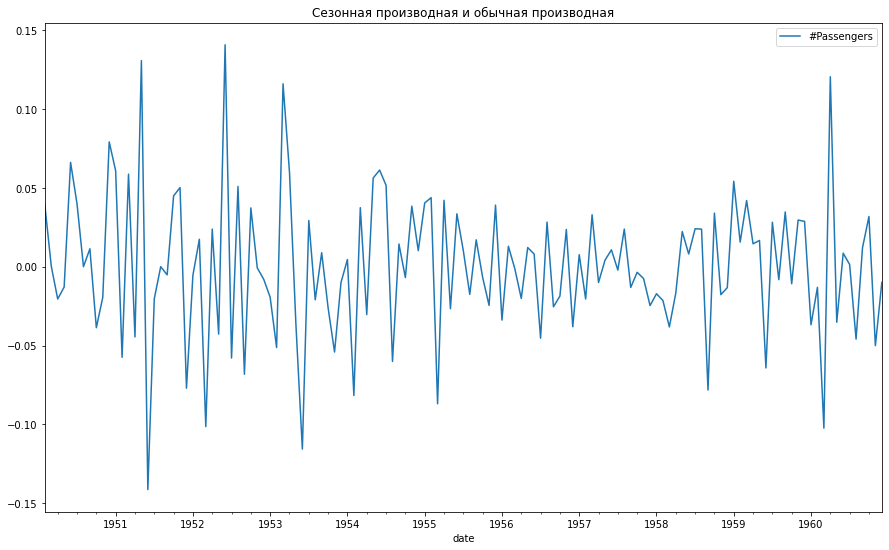

In [48]:
dd_dfl = d_dfl.diff().dropna()
dd_dfl.plot(figsize=(15,9))
plt.title('Сезонная производная и обычная производная')
plt.show()

In [52]:
from statsmodels.tsa.stattools import adfuller
kpss(dd_dfl.dropna())
adfuller(dd_dfl.dropna())

/home/bakhtiyar/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(-4.4433249418311425,
 0.00024859123113838495,
 12,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 -415.5597525461335)

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

X, y = dfl[:-24], dfl[-24:]
model = SARIMAX(X,
                seasonal_order=(1,1,0,12),
                order=(2,1,0)).fit()
model.summary()
y_sar = model.forecast(24)
y_sar = np.exp(y_sar)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61073D+00    |proj g|=  4.32164D+00

At iterate    5    f= -1.62237D+00    |proj g|=  2.23745D-02

At iterate   10    f= -1.62282D+00    |proj g|=  2.52798D-01


 This problem is unconstrained.



At iterate   15    f= -1.62286D+00    |proj g|=  2.92155D-02

At iterate   20    f= -1.62287D+00    |proj g|=  3.45340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     29      1     0     0   3.453D-03  -1.623D+00
  F =  -1.6228682153975229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


## Хольт-Уинтерс

In [167]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

X, y = df[:-24], df[-24:]

model = ETSModel(np.log(X['#Passengers']),
                 seasonal='mul',
                 trend='add',
                 seasonal_periods=12,
                 damped_trend=False).fit()

y_ets = np.exp(model.forecast(24))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.45274D-01    |proj g|=  4.91722D+00

At iterate    1    f= -1.40649D+00    |proj g|=  3.70226D+00

At iterate    2    f= -1.45921D+00    |proj g|=  1.96747D+00

At iterate    3    f= -1.51560D+00    |proj g|=  2.32378D+00

At iterate    4    f= -1.63374D+00    |proj g|=  3.00893D+00

At iterate    5    f= -1.67330D+00    |proj g|=  4.59873D+00

At iterate    6    f= -1.70991D+00    |proj g|=  2.85233D+00

At iterate    7    f= -1.75572D+00    |proj g|=  2.06108D+00

At iterate    8    f= -1.81398D+00    |proj g|=  1.94882D+00

At iterate    9    f= -1.82442D+00    |proj g|=  2.41391D+00

At iterate   10    f= -1.85450D+00    |proj g|=  1.40041D+00

At iterate   11    f= -1.87324D+00    |proj g|=  2.90988D+00

At iterate   12    f= -1.88093D+00    |proj g|=  3.59503D+00

At iterate   13    f= -1.8

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                       ETS(AAM)   Log Likelihood                 235.926
Date:                Tue, 31 Oct 2023   AIC                           -435.851
Time:                        00:03:01   BIC                           -385.677
Sample:                    01-31-1949   HQIC                          -415.475
                         - 12-31-1958   Scale                            0.001
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.6944      0.099      7.040      0.000       0.501       0.888
smoothing_trend      6.944e-05        nan        nan        nan         nan         nan
smoothing_seasonal   3.056e-05        nan        nan        nan         nan         nan
initial_level           4.7240      5.943      0.795      0.427      -6.924      16.372
initial_trend           0.0094      0.012      0.782      0.434      -0.014       0.033
initial_seasonal.0      0.9978      1.255      0.795      0.427      -1.463       3.458
initial_seasonal.1      0.9762      1.228      0.795      0.427      -1.431       3.383
initial_seasonal.2      1.0023      1.261      0.795      0.427      -1.469       3.474
initial_seasonal.3      1.0283      1.294      0.795      0.427      -1.507       3.564
initial_seasonal.4      1.0537      1.326      0.795      0.427      -1.545       3.652
initial_seasonal.5      1.0553      1.328      0.795      0.427      -1.547       3.657
initial_seasonal.6      1.0371      1.305      0.795      0.427      -1.520       3.595
initial_seasonal.7      1.0136      1.275      0.795      0.427      -1.486       3.513
initial_seasonal.8      1.0149      1.277      0.795      0.427      -1.488       3.517
initial_seasonal.9      1.0226      1.286      0.795      0.427      -1.499       3.544
initial_seasonal.10     0.9971      1.254      0.795      0.427      -1.462       3.456
initial_seasonal.11     1.0000      1.258      0.795      0.427      -1.466       3.466
===================================================================================
Ljung-Box (Q):                       27.83   Jarque-Bera (JB):                 2.34
Prob(Q):                              0.27   Prob(JB):                         0.31
Heteroskedasticity (H):               0.42   Skew:                            -0.34
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Подход Тинька

In [105]:
dft = np.log(df).reset_index()
dft['year'] = dft['date'].dt.year
dft['month'] = dft['date'].dt.month
dft['quarter'] = dft['date'].dt.quarter
dft['month_sin'] = np.sin(2 * np.pi * dft['month'] / 12)
dft['month_cos'] = np.cos(2 * np.pi * dft['month'] / 12)
dft['passengers_1yr_ago'] = dft['#Passengers'].shift(12)
dft = dft.dropna()
dft['time_index'] = range(1, len(dft) + 1)
dft = dft.drop('date', axis=1)
dft

,#Passengers,year,month,quarter,month_sin,month_cos,passengers_1yr_ago,time_index
12,4.744932,1950,1,1,5.000000e-01,8.660254e-01,4.718499,1
13,4.836282,1950,2,1,8.660254e-01,5.000000e-01,4.770685,2
14,4.948760,1950,3,1,1.000000e+00,6.123234e-17,4.882802,3
15,4.905275,1950,4,2,8.660254e-01,-5.000000e-01,4.859812,4
16,4.828314,1950,5,2,5.000000e-01,-8.660254e-01,4.795791,5
...,...,...,...,...,...,...,...,...
139,6.406880,1960,8,3,-8.660254e-01,-5.000000e-01,6.326149,128
140,6.230481,1960,9,3,-1.000000e+00,-1.836970e-16,6.137727,129
141,6.133398,1960,10,4,-8.660254e-01,5.000000e-01,6.008813,130
142,5.966147,1960,11,4,-5.000000e-01,8.660254e-01,5.891644,131


In [106]:
X = dft.drop('#Passengers', axis=1)
X_train, X_test = X[:-24], X[-24:]
y = dft['#Passengers']
y_train, y_test = y[:-24], y[-24:]

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Random Forest MSE:", rf_mse)
print("Random Forest R-squared:", rf_r2)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)

y_lr = np.exp(lr_pred)

Random Forest MSE: 0.010756160635097975
Random Forest R-squared: 0.5747178903150771
Linear Regression MSE: 0.001122863750813168
Linear Regression R-squared: 0.955603687873875


## Подведение итогов

Linear Regression MSE: 212.708657760205
SARIMA MSE: 2969.111090361392
ETSModel MSE: 575.02670781563


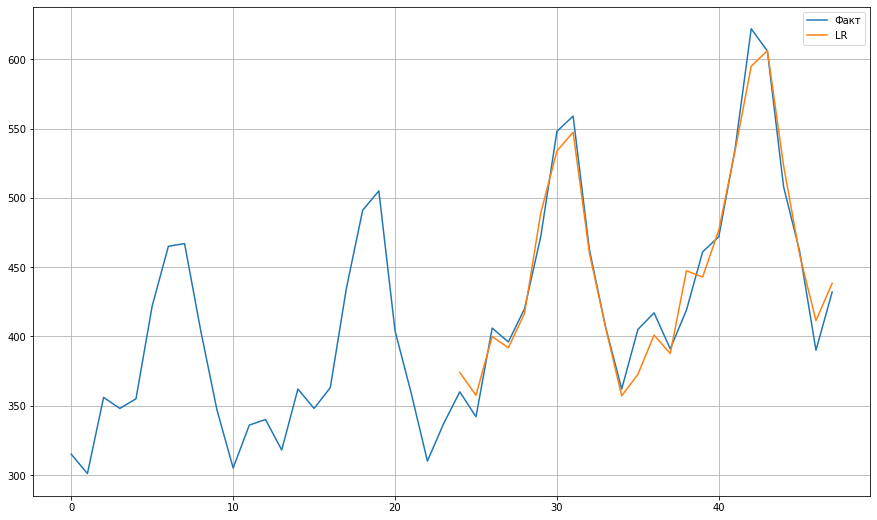

In [170]:
print("Linear Regression MSE:", mean_squared_error(y, y_lr))
print(f'SARIMA MSE: {mean_squared_error(y, y_sar)}')
print(f'ETSModel MSE: {mean_squared_error(y, y_ets)}')

x0 = range(len(X[-48:]))
x = range(len(X[-24:]), len(X[-24:])+24)
plt.figure(figsize=(15, 9))
plt.plot(range(len(df[-48:])), df['#Passengers'][-48:], label='Факт')
plt.plot(x, y_lr, label='LR')
#plt.plot(x, y_sar, label = 'SARIMA')
#plt.plot(x, y_ets, label='Хольт-Уинтерс')
plt.legend()
plt.grid()
plt.show()